In [1]:
# -*- coding: utf-8 -*-

"""
Side-Channel Analysis 101
1. a few examples of data IO

lasf modified 2022.04.23

----------------------------------------------------
Sunghyun Jin
sunghyunjin@korea.ac.kr
https://sunghyunjin.com

Cryptographic Algorithm Lab.

School of Cyber Security,
Korea University,
Republic of Korea

Center for Information Security Technologies (CIST),
Institute of Cyber Security & Privacy (ICSP),
Korea University,
Republic of Korea
----------------------------------------------------
"""

print('')

In this notebook, we look at how to load data from the following formats:
- __binary data__
- __mat__ is a matlab basic file format
- __hdf5__ (Hierarchical Data Format version 5) is an open source file format that supports large, complex, heterogeneous data

In [2]:
import os

import numpy as np
import tqdm

In [3]:
def check_file_exists(file_path, verbose = True):
    if os.path.exists(file_path) == False:
        if verbose:
            print("Error: provided file path '%s' does not exist!" % file_path)
        return False
    if verbose:
        print("EXIST :", file_path)
    return True

In [4]:
print(check_file_exists('abc.txt'))

Error: provided file path 'abc.txt' does not exist!
False


In [5]:
print(check_file_exists('1_data_io.ipynb'))

EXIST : 1_data_io.ipynb
True


## 1. Binary data <- struct

In [6]:
import struct

In [7]:
fpath = '../dataset'

In [8]:
fname = fpath + '/secmatv1_2006_04_0809/key.txt'
if check_file_exists(fname):
    f = open(fname)
    key = f.readline()[:2*8]
    f.close()

    print(key)
    key = np.array([int(key[i:i+2],16) for i in range(0, 16, 2)])
    print(key.shape, key)

EXIST : ../dataset/secmatv1_2006_04_0809/key.txt
6A65786A65786A65
(8,) [106 101 120 106 101 120 106 101]


In [9]:
fname = fpath + '/secmatv1_2006_04_0809/plaintext.txt'
if check_file_exists(fname):
    f = open(fname)
    pt = []
    for p in f:
      pt.append([int(p[i:i+2],16) for i in range(0, 16, 2)])
    f.close()

    pt = np.array(pt)
    print(pt.shape)
    print(''.join(['%02X' % i for i in pt[0]]))
    print(''.join(['%02X' % i for i in pt[-1]]))

EXIST : ../dataset/secmatv1_2006_04_0809/plaintext.txt
(3086, 8)
3E05F1ECD96733B7
EFC4F81424038BCD


In [10]:
fname = fpath + '/secmatv1_2006_04_0809/ciphertext.txt'
if check_file_exists(fname):
    f = open(fname)
    ct = []
    for c in f:
      ct.append([int(c[i:i+2],16) for i in range(0, 16, 2)])
    f.close()

    ct = np.array(ct)
    print(ct.shape)
    print(''.join(['%02X' % i for i in ct[0]]))
    print(''.join(['%02X' % i for i in ct[-1]]))

EXIST : ../dataset/secmatv1_2006_04_0809/ciphertext.txt
(3086, 8)
0586F792B803AE7B
1FC29DA1302F125D


In [11]:
tr = []
for i in tqdm.tqdm(range(10)):
    fname = fpath + '/secmatv1_2006_04_0809/traces/wave_DES_HW_%06d.bin' % i
    if check_file_exists(fname, False):
        f = open(fname, 'rb')
        f.seek(0xA0)
        tmp = f.read(4)
        trlen = struct.unpack('<i', tmp)[0]
        tmp = f.read(trlen)
        trtmp = [struct.unpack('<f', tmp[j:j+4])[0] for j in range(0, trlen, 4)]
        tr.append(trtmp)

tr = np.array(tr)
print(tr.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 172.42it/s]

(10, 20003)


## 2. mat <- scipy

In [12]:
import scipy.io as spio

In [13]:
fname = fpath + '/secmatv1_2006_04_0809.mat'
'''
if check_file_exists(fname):
    tmp = spio.loadmat(fname)
    
    print(spio.whosmat(fname))
    
    key = tmp['key'].T
    key = key[0]
    pt = tmp['pt'].T
    ct = tmp['ct'].T
    tr = tmp['tr'].T

    print('key        :', key.shape, key)
    print('traces     :', tr.shape, tr)
    print('plaintext  :', pt.shape, pt)
    print('ciphertext :', ct.shape, ct)
    del tmp
'''
check_file_exists(fname)

EXIST : ../dataset/secmatv1_2006_04_0809.mat


True

In [14]:
tmp = spio.loadmat(fname)
print(spio.whosmat(fname))

[('ct', (8, 3085), 'double'), ('key', (8, 1), 'double'), ('pt', (8, 3085), 'double'), ('tr', (20003, 3085), 'double')]


In [15]:
key = tmp['key'].T
key = key[0]
pt = tmp['pt'].T
ct = tmp['ct'].T
tr = tmp['tr'].T

print('key        :', key.shape, key)
print('traces     :', tr.shape, tr)
print('plaintext  :', pt.shape, pt)
print('ciphertext :', ct.shape, ct)

key        : (8,) [106 101 120 106 101 120 106 101]
traces     : (3085, 20003) [[ 9.48953675e-04  3.40548111e-04 -3.64649226e-04 ... -4.47613624e-04
  -4.47613624e-04  1.19309720e-04]
 [-1.89642687e-05  4.64994693e-04 -1.71065651e-04 ... -3.09339637e-04
  -1.89642687e-05 -9.86882136e-04]
 [ 1.41908519e-03  2.57583713e-04  3.40548111e-04 ...  5.61786466e-04
   8.24507035e-04  5.20304311e-04]
 ...
 [-6.68852008e-04 -9.17745172e-04  2.25179283e-05 ... -1.01928665e-04
   1.50204962e-03  1.03191810e-03]
 [ 1.36377558e-03  3.54375486e-04 -3.50821851e-04 ...  2.29928904e-04
  -4.47613624e-04  1.07340026e-03]
 [ 1.21167419e-03  6.17096084e-04  5.75613871e-04 ...  4.51167289e-04
  -6.13542390e-04  9.16549252e-05]]
plaintext  : (3085, 8) [[ 62   5 241 ... 103  51 183]
 [201  42 217 ...  67  47 238]
 [129 235  97 ... 195 155 103]
 ...
 [225   4  62 ...  10 118 190]
 [254  68 197 ... 172 251 224]
 [239 196 248 ...   3 139 205]]
ciphertext : (3085, 8) [[  5 134 247 ...   3 174 123]
 [200 160  52 ..

In [16]:
del tmp

## 3. hdf5 <- h5py

In [17]:
import h5py

In [18]:
fname = fpath + '/secmatv1_2006_04_0809.h5'
'''
if check_file_exists(fname):
    h5f = h5py.File(fname, 'r')

    print(list(h5f.keys()))

    print('traces     :', h5f['traces'].shape)
    print('plaintext  :', h5f['plaintext'].shape)
    print('ciphertext :', h5f['ciphertext'].shape)
    print('key        :', h5f['key'].shape)

    tr = h5f['traces'][:]
    pt = h5f['plaintext'][:]
    ct = h5f['ciphertext'][:]
    key = h5f['key'][0]

    print('traces     :', tr.shape)
    print('plaintext  :', pt.shape)
    print('ciphertext :', ct.shape)
    print('key        :', key.shape)

    h5f.close()
'''
check_file_exists(fname)

EXIST : ../dataset/secmatv1_2006_04_0809.h5


True

In [19]:
h5f = h5py.File(fname, 'r')
print(list(h5f.keys()))

['ciphertext', 'key', 'plaintext', 'traces']


In [20]:
print('traces     :', h5f['traces'].shape)
print('plaintext  :', h5f['plaintext'].shape)
print('ciphertext :', h5f['ciphertext'].shape)
print('key        :', h5f['key'].shape)

traces     : (3085, 20003)
plaintext  : (3085, 8)
ciphertext : (3085, 8)
key        : (1, 8)


In [21]:
h5f['traces']

<HDF5 dataset "traces": shape (3085, 20003), type "<f4">

In [22]:
h5f['traces'][5,100:110]

array([0.04156002, 0.04476798, 0.04700802, 0.05042339, 0.05419827,
       0.0562309 , 0.05806994, 0.06097369, 0.0631999 , 0.06512191],
      dtype=float32)

In [23]:
tr = h5f['traces'][:]
pt = h5f['plaintext'][:]
ct = h5f['ciphertext'][:]
key = h5f['key'][0]

print('traces     :', tr.shape)
print('plaintext  :', pt.shape)
print('ciphertext :', ct.shape)
print('key        :', key.shape)

traces     : (3085, 20003)
plaintext  : (3085, 8)
ciphertext : (3085, 8)
key        : (8,)


In [24]:
h5f.close()

## 4. Visualization

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

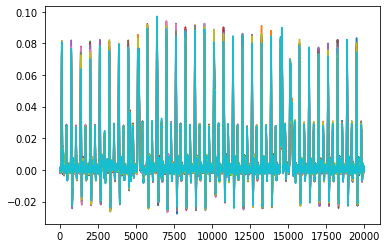

In [26]:
plt.plot(tr[:10].T)
plt.show()

In [27]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.resources import INLINE
from bokeh.models import Span
from bokeh.palettes import Spectral11

output_notebook(INLINE)

Loading BokehJS ...

In [28]:
deltaplot = figure(plot_width=800)
xrange = list(range(tr.shape[1]))
for i, t in enumerate(tr[:10]):
    deltaplot.line(xrange, t, color = Spectral11[i % len(Spectral11)])
show(deltaplot)